In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures, StandardScaler
from sklearn import tree,linear_model,neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":10,"axes.titlesize":24,"axes.labelsize":24}) 
from sklearn import model_selection

# Upload data (customers model)

In [94]:
train=pd.read_csv('TrainClean.csv',index_col=0).reset_index(drop=True)
test=pd.read_csv('TestClean.csv',index_col=0).reset_index(drop=True)
NumberOfSales=train["NumberOfSales"]
NumberOfCustomers=train["NumberOfCustomers"]
del train["NumberOfSales"]
del train["NumberOfCustomers"]
columnscustomer_lasso=['HasPromotions', 'NearestCompetitor', 'Region_AreaKM2',
       'Mean_Dew_PointC', 'Mean_Sea_Level_PressurehPa', 'Mean_VisibilityKm',
       'Precipitationmm', 'StandardMarket', 'HyperMarket', 'ShoppingCenter',
       'General', 'WithFishDepartment', 'Region0', 'Region1', 'Region3',
       'Region4', 'Region5', 'Region6', 'Region7', 'Region8', 'Region9',
       'January', 'February', 'April', 'May', 'June', 'September', 'October',
       'November', 'December', 'Nothing', 'Fog', 'Snow']
columnssales_lasso=['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region_AreaKM2',
       'Region_PopulationK', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa',
       'Mean_TemperatureC', 'Mean_Wind_SpeedKm_h', 'Precipitationmm',
       'StandardMarket', 'HyperMarket', 'SuperMarket', 'ShoppingCenter',
       'WithFishDepartment', 'WithNonFoodDepartment', 'Region0', 'Region1',
       'Region2', 'Region3', 'Region4', 'Region6', 'Region7', 'Region8',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'September', 'October', 'November', 'December', 'Nothing', 'Fog',
       'Thunderstorm', 'Snow', 'Rain']


# Normalize

In [38]:
all_data_index = train.columns
all_data = pd.concat((train.loc[:,all_data_index],test.loc[:,all_data_index]), ignore_index=True)
columns = all_data.columns

In [39]:
x = all_data.values
min_max_scaler = MinMaxScaler()
all_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(x))
all_data_normalized.columns = columns

In [40]:
test_offset = train.shape[0]
train_normalized = all_data_normalized.iloc[0:test_offset,:]
test_normalized = all_data_normalized.iloc[test_offset:all_data_normalized.shape[0],:]
train=train_normalized
test=test_normalized

# Linear regression directly for sales

In [59]:
x=train
y=NumberOfSales
#clf = linear_model.LinearRegression()
clf = tree.DecisionTreeRegressor(max_depth=6)
clf = clf.fit(x, y)
yp = clf.predict(x).reshape(-1,1)
cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
print(cross)

0.1484320760160057


# Linear regression for customers

In [60]:
x=train
y=NumberOfCustomers
#clf = linear_model.LinearRegression()
clf = tree.DecisionTreeRegressor(max_depth=6)
clf = clf.fit(x, y)
yp = clf.predict(x).reshape(-1,1)
cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
print(cross)

0.2116477463036558


# Normalize predicted customers

In [ ]:
min_max_scaler = MinMaxScaler()
customers_normalized = pd.DataFrame(min_max_scaler.fit_transform(yp.values))
x['PredictedCustomers']=customers_normalized

# Linear regression for sales

In [56]:
x.describe()

,IsHoliday,HasPromotions,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,...,November,December,Snow,Nothing,Fog,Hail,Thunderstorm,Rain,ZeroClouds,PredictedCustomers
count,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.00000,...,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000,433958.000000
mean,0.000945,0.449507,8042.993882,12313.341916,14045.556837,3845.765475,6.285320,74.859115,1014.979698,10.33585,...,0.080238,0.077973,0.076784,0.238873,0.254421,0.006415,0.061453,0.592698,0.000129,312.547433
std,0.030723,0.497444,11640.203554,9114.075588,2760.416990,2816.324768,5.862926,12.928407,8.262854,7.04847,...,0.271662,0.268129,0.266249,0.426396,0.435536,0.079839,0.240160,0.491333,0.011359,89.595913
min,0.000000,0.000000,47.000000,344.000000,9893.000000,816.000000,-15.000000,30.000000,974.000000,-13.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.903810
25%,0.000000,0.000000,1057.000000,7215.000000,11849.000000,1293.000000,2.000000,66.000000,1010.000000,4.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,260.106650
50%,0.000000,0.000000,3307.000000,9337.000000,15017.000000,1892.000000,7.000000,76.000000,1015.000000,11.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,303.939642
75%,0.000000,1.000000,9761.000000,15566.000000,15931.000000,5727.000000,11.000000,85.000000,1020.000000,16.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,351.510248
max,1.000000,1.000000,85070.000000,32221.000000,23931.000000,8146.000000,20.000000,100.000000,1040.000000,30.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1135.469353


In [61]:
customers_normalized = pd.DataFrame(yp)
x['PredictedCustomers']=customers_normalized
y=NumberOfSales
#clf = linear_model.LinearRegression()
clf = tree.DecisionTreeRegressor(max_depth=6)
clf = clf.fit(x, y)
yp = clf.predict(x).reshape(-1,1)
cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
print(cross)

0.21448745643748313


# For cycle

In [10]:
n=3
for i in np.arange(n)+1:
    print ("Complexity %d\n" % i)
    #x=train[columnssales]
    x=train
    y=NumberOfSales
    clf=neighbors.KNeighborsRegressor(i)
    #clf = linear_model.LinearRegression()
    #clf = tree.DecisionTreeRegressor(max_depth=6)
    clf = clf.fit(x, y)
    yp = clf.predict(x).reshape(-1,1)
    cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
    print("Linear regression diretta su sales")
    print(cross)
    x=train[columnscustomer]
    y=NumberOfCustomers
    clf=neighbors.KNeighborsRegressor(i)
    #clf = linear_model.LinearRegression()
    #clf = tree.DecisionTreeRegressor(max_depth=6)
    clf = clf.fit(x, y)
    yp = clf.predict(x).reshape(-1,1)
    cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
    print("Linear regression su customers")
    print(cross)
    customers_normalized = pd.DataFrame(yp)
    x=train[columnssales]
    x['PredictedCustomers']=customers_normalized
    y=NumberOfSales
    clf=neighbors.KNeighborsRegressor(i)
    #clf = linear_model.LinearRegression()
    #clf = tree.DecisionTreeRegressor(max_depth=6)
    clf = clf.fit(x, y)
    yp = clf.predict(x).reshape(-1,1)
    cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
    del x['PredictedCustomers']
    print("Linear regression su sales con customers predetti")
    print(cross)
    print("\n")

Complexity 1



KeyboardInterrupt: 

# Upload data

In [ ]:
#train = pd.read_csv('FinalTrain.csv',index_col=0).reset_index(drop=True)
#test = pd.read_csv('FinalTest.csv',index_col=0).reset_index(drop=True)
#NumberOfSales=train["NumberOfSales"]
#NumberOfCustomers=train["NumberOfCustomers"]
#del train["NumberOfSales"]
#del train["NumberOfCustomers"]

# Normalization

In [ ]:
#x = all_data.values
#min_max_scaler = MinMaxScaler()
#all_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(x))
#all_data_normalized.columns = columns

# Trial of different model complexities

In [ ]:
x=train
y=NumberOfCustomers
perf=[]
cross_tot=[]
n=30
for i in np.arange(n)+1:
    
    clf = tree.DecisionTreeRegressor(max_depth=i)
    
    #clf = linear_model.LinearRegression()
    #poly=PolynomialFeatures(i)
    #xp=poly.fit_transform(x)
    
    #clf=neighbors.KNeighborsRegressor(i)
    
    clf = clf.fit(x, y)
    #clf = clf.fit(xp, y)
    yp = clf.predict(x).reshape(-1,1)
    #yp = clf.predict(xp).reshape(-1,1)
    
    cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
    #cross=cross_val_score(clf,xp,y).mean()
    cross_tot.append(cross)
    perf.append((i,mean_squared_error(y,yp),r2_score(y,yp),cross))
print("Complexity , RMSE , R2 , crossval_score")
perf

In [ ]:
plt.plot(list(np.arange(n)+1),cross_tot,)

# Iper mega FOR crossvalidatore

In [104]:
def GradientBoosting_eval(models,x):
    prediction = np.zeros((len(x),1))
    for model in models:
        yp = model.predict(x).reshape(-1,1)
        prediction += yp
    return prediction.reshape(-1,1)
crossperf=[]
for j in range(3):
    x=train
    x['NumberOfCustomers']=NumberOfCustomers
    train_data, test_data = model_selection.train_test_split(x, test_size = 0.3)
    x=train_data
    y=x['NumberOfCustomers'].values.reshape(-1,1)
    x=x[columnscustomer]
    y_test=test_data['NumberOfCustomers'].values.reshape(-1,1)
    test_data=test_data[columnscustomer]
    perf=[]
    model_list=[] # lol
    prediction = np.zeros((len(y),1))
    clf = tree.DecisionTreeRegressor(max_depth=6) # it is the best one
    #clf = linear_model.LinearRegression()
    #clf=neighbors.KNeighborsRegressor(2)
    clf = clf.fit(x, y)
    model_list.append(clf)
    yp = clf.predict(x).reshape(-1,1)
    prediction += yp
    y_residual = y-yp
    result=GradientBoosting_eval(model_list,test_data)
    perf.append(r2_score(y_test,result))
    no_boosting_runs = 100
    for i in range(no_boosting_runs):
        clf = tree.DecisionTreeRegressor(max_depth=6)
        #clf = linear_model.LinearRegression()
        # suggested no_boosting_runs = 3 for KNN
        #clf=neighbors.KNeighborsRegressor(2)
        clf = clf.fit(x, y_residual)
        model_list.append(clf)
        yp = clf.predict(x).reshape(-1,1)
        # update the prediction
        prediction += yp
        y_residual = y-prediction
        result=GradientBoosting_eval(model_list,test_data)
        perf.append(r2_score(y_test,result))
        perf[-20:]
        crossperf.append(perf)

In [105]:
for i in range(no_boosting_runs):
    perflist=[]
    for performance in crossperf:
        perflist.append(performance[i])
    finalperf.append(np.average(perflist))
    del perflist
    print("Boosting %d : %d modelli - R2: %f\n" % (i,i+1,finalperf[i]))

Boosting 0 : 1 modelli - R2: 0.471491

Boosting 1 : 2 modelli - R2: 0.471491

Boosting 2 : 3 modelli - R2: 0.471491

Boosting 3 : 4 modelli - R2: 0.543984

Boosting 4 : 5 modelli - R2: 0.607452

Boosting 5 : 6 modelli - R2: 0.641213

Boosting 6 : 7 modelli - R2: 0.656377

Boosting 7 : 8 modelli - R2: 0.668865

Boosting 8 : 9 modelli - R2: 0.691021

Boosting 9 : 10 modelli - R2: 0.716379

Boosting 10 : 11 modelli - R2: 0.732597

Boosting 11 : 12 modelli - R2: 0.742542

Boosting 12 : 13 modelli - R2: 0.759311

Boosting 13 : 14 modelli - R2: 0.765374

Boosting 14 : 15 modelli - R2: 0.772312

Boosting 15 : 16 modelli - R2: 0.780664

Boosting 16 : 17 modelli - R2: 0.791290

Boosting 17 : 18 modelli - R2: 0.798428

Boosting 18 : 19 modelli - R2: 0.805559

Boosting 19 : 20 modelli - R2: 0.809602

Boosting 20 : 21 modelli - R2: 0.813325

Boosting 21 : 22 modelli - R2: 0.816135

Boosting 22 : 23 modelli - R2: 0.474081

Boosting 23 : 24 modelli - R2: 0.555974

Boosting 24 : 25 modelli - R2: 0.60

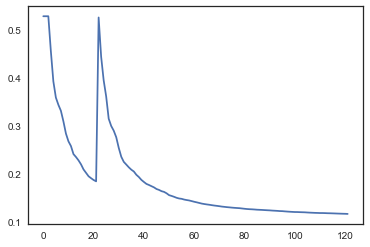

In [108]:
plt.plot(np.ones(len(finalperf))-finalperf)

# Gradient boosting

Step 1: generate a first model

In [106]:
def GradientBoosting_eval(models,x):
    prediction = np.zeros((len(x),1))
    for model in models:
        yp = model.predict(x).reshape(-1,1)
        prediction += yp
    return prediction.reshape(-1,1)

In [81]:
x=train
x['NumberOfCustomers']=NumberOfCustomers
train_data, test_data = model_selection.train_test_split(x, test_size = 0.3)
x=train_data
y=x['NumberOfCustomers'].values.reshape(-1,1)
x=x[columnscustomer]
y_test=test_data['NumberOfCustomers'].values.reshape(-1,1)
test_data=test_data[columnscustomer]

In [87]:
perf=[]
model_list=[] # lol
prediction = np.zeros((len(y),1))
clf = tree.DecisionTreeRegressor(max_depth=6) # it is the best one
#clf = linear_model.LinearRegression()
#clf=neighbors.KNeighborsRegressor(2)
clf = clf.fit(x, y)
model_list.append(clf)
yp = clf.predict(x).reshape(-1,1)
prediction += yp
y_residual = y-yp
result=GradientBoosting_eval(model_list,test_data)
perf.append(r2_score(y_test,result))

Step 2: loop generating models trained in predicting the residuals of the previous model

In [88]:
no_boosting_runs = 10
for i in range(no_boosting_runs):
    clf = tree.DecisionTreeRegressor(max_depth=6)
    #clf = linear_model.LinearRegression()
    # suggested no_boosting_runs = 3 for KNN
    #clf=neighbors.KNeighborsRegressor(2)
    clf = clf.fit(x, y_residual)
    model_list.append(clf)
    yp = clf.predict(x).reshape(-1,1)
    # update the prediction
    prediction += yp
    y_residual = y-prediction
    result=GradientBoosting_eval(model_list,test_data)
    perf.append(r2_score(y_test,result))

In [89]:
print("R2")
perf[-20:]

R2


[0.4691955129691745,
 0.5449799960755404,
 0.6148362300778684,
 0.6490664140667763,
 0.6658969490613148,
 0.6805644501162357,
 0.7113830435532684,
 0.7306183004045717,
 0.734793070824465,
 0.7578919397726616,
 0.7694945022305872]

In [50]:
y

array([[ 89],
       [316],
       [375],
       ...,
       [442],
       [224],
       [234]], dtype=int64)

Definition of a function to boosted model evaluation

In [99]:
def GradientBoosting_eval(models,x):
    prediction = np.zeros((len(x),1))
    for model in models:
        yp = model.predict(x).reshape(-1,1)
        prediction += yp
    return prediction.reshape(-1,1)

result=GradientBoosting_eval(model_list,x)

In [100]:
result

array([[466.0846229 ],
       [498.78884011],
       [498.48281163],
       ...,
       [297.61013953],
       [312.8130995 ],
       [272.79529979]])

In [101]:
model_list

[DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6,